## Visualization of all training runs

In [7]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

In [8]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn_3_spider_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/dqn_3_spider_*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_3*', recursive = True):
    tb_files.append(filename)

tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file and not "lowlr" in file]
# tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollo

In [9]:
readers = [SummaryReader(file, pivot = True) for file in tb_files]

In [10]:
log_paths = [reader.log_path for reader in readers]
display(log_paths)

['training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollo

In [13]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

# pd.set_option('display.max_rows', 500)
dfs = []
for reader in readers:
    temp_df = reader.scalars
    # print(reader.log_path)
    # print(temp_df.columns)
    if "seqdqn" in reader.log_path:
        display(reader.scalars)
    if "sac_3_spider" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    print(reader.log_path)
    temp_df = temp_df[["step", "rollout/reward_sum"]] 

    print(re.sub("training/spiderenv_training/", "", re.sub("(_\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)))
    temp_df.insert(2, "dir_name", np.repeat(re.sub("training/spiderenv_training/", "", re.sub("(_\d)?(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)), len(reader.scalars.index)))
    # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
    temp_df["step"] = temp_df.index
    if "seqsac" in reader.log_path or "seqdqn" in reader.log_path:
        temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
    temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
    temp_df = temp_df[temp_df.step > 25]
    # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
    temp_df.dropna()
    dfs.append(temp_df)
    print("succes")
print("all success")

training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2
seqsac_spider
succes


,step,rollout/reward_sum
0,0,0.917000
1,1,-0.032000
2,2,-0.048000
3,3,-0.086000
4,4,0.937000
...,...,...
24232,24232,17.938000
24233,24233,27.969999
24234,24234,19.031000
24235,24235,34.973000


training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent0
seqdqn_spider
succes


,step,rollout/reward_sum
0,0,0.949000
1,1,-0.056000
2,2,-0.012000
3,3,-0.040000
4,4,0.915000
...,...,...
24232,24232,18.038000
24233,24233,27.978001
24234,24234,18.941000
24235,24235,34.974998


training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent1
seqdqn_spider
succes


,step,rollout/reward_sum
0,0,0.927000
1,1,-0.040000
2,2,-0.072000
3,3,-0.086000
4,4,0.959000
...,...,...
24232,24232,18.011999
24233,24233,27.952000
24234,24234,19.014999
24235,24235,34.973000


training/spiderenv_training/seqdqn_3_spider_3/tensorboard_logs/rollout_reward_sum_agent2
seqdqn_spider
succes


,step,rollout/reward_sum
0,0,0.977000
1,1,-0.044000
2,2,-0.092000
3,3,-0.078000
4,4,1.914000
...,...,...
17884,17884,22.985001
17885,17885,25.959999
17886,17886,15.940000
17887,17887,30.965000


training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0
seqdqn_spider
succes


,step,rollout/reward_sum
0,0,0.923000
1,1,-0.050000
2,2,-0.068000
3,3,-0.046000
4,4,1.932000
...,...,...
17884,17884,22.997000
17885,17885,25.983999
17886,17886,15.934000
17887,17887,30.959000


training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1
seqdqn_spider
succes


,step,rollout/reward_sum
0,0,0.949000
1,1,-0.042000
2,2,-0.084000
3,3,-0.046000
4,4,1.920000
...,...,...
17884,17884,22.947001
17885,17885,25.990000
17886,17886,16.032000
17887,17887,30.969000


training/spiderenv_training/seqdqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2
seqdqn_spider
succes
training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent0
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent1
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent2
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_3/tensorboard_logs/rollout_reward_sum_agent0
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_3/tensorboard_logs/rollout_reward_sum_agent1
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_3/tensorboard_logs/rollout_reward_sum_agent2
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0
seqsac_spider
succes
training/spiderenv_training/seqsac_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1
seqsac_spider
succes
training/s

,step,rollout/ep_len,rollout/reward_sum,train/average_loss,train/avg_Q_target_value,train/avg_Q_value,train/epsilon
0,0,100.0,"[0.9269999861717224, 0.9490000009536743, 0.916...",NaN,NaN,NaN,NaN
1,1,100.0,"[-0.03999999910593033, -0.0560000017285347, -0...",NaN,NaN,NaN,NaN
2,2,100.0,"[-0.07199999690055847, -0.012000000104308128, ...","[0.0003010221989825368, 0.0015225039096549153,...","[0.06842181086540222, 0.08883922547101974, 0.0...","[0.05038522183895111, 0.06629013270139694, 0.0...",0.899746
3,3,100.0,"[-0.03999999910593033, -0.0860000029206276, -0...","[3.087929871981032e-05, 6.147462408989668e-05,...","[0.05543770641088486, 0.07212818413972855, 0.0...","[0.07185666263103485, 0.08189427852630615, 0.0...",0.899661
4,4,100.0,"[0.9150000214576721, 0.9589999914169312, 0.936...","[0.0001509877183707431, 2.010727439483162e-05,...","[0.06358999758958817, 0.07648701220750809, 0.0...","[0.07778499275445938, 0.06322433054447174, 0.0...",0.899576
...,...,...,...,...,...,...,...
24233,24233,100.0,"[27.97800064086914, 27.969999313354492, 27.951...","[0.0022315680980682373, 0.012722000479698181, ...","[32.78129959106445, 32.9246940612793, 32.85146...","[32.85163497924805, 32.78105926513672, 32.9245...",0.050000
24234,24234,100.0,"[18.94099998474121, 19.0310001373291, 19.01499...","[0.0021089192014187574, 0.012834634631872177, ...","[32.86210250854492, 32.7932243347168, 32.93441...","[32.86204528808594, 32.79328155517578, 32.9344...",0.050000
24235,24235,100.0,"[34.972999572753906, 34.974998474121094, 34.97...","[0.012983500026166439, 0.0021335482597351074, ...","[32.926727294921875, 32.78398513793945, 32.852...","[32.85280227661133, 32.92658996582031, 32.7841...",0.050000
24236,24236,NaN,"[30.96500015258789, 30.961000442504883, 30.972...","[0.0025689166504889727, 0.012809164822101593, ...","[32.924217224121094, 32.85181427001953, 32.780...","[32.85186767578125, 32.78072738647461, 32.9243...",NaN


training/spiderenv_training/seqdqn_3_spider_3
seqdqn_spider


DataError: No numeric types to aggregate

In [ ]:
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df

,step,rollout/reward_sum,dir_name,avg_reward_sum
50,50,0.923000,dqn_spider,0.503920
75,75,0.935000,dqn_spider,0.736240
100,100,-0.008000,dqn_spider,0.552760
125,125,-0.064000,dqn_spider,0.663760
150,150,0.026000,dqn_spider,0.624120
...,...,...,...,...
71175,71175,30.976999,sac_spider,24.013267
71200,71200,-0.033333,sac_spider,26.013293
71225,71225,24.966999,sac_spider,24.494067
71250,71250,25.971333,sac_spider,23.934280


In [ ]:
display(df["dir_name"].unique())

array(['dqn_spider', 'seqsac_spider_no_id', 'seqsac_spider',
       'seqdqn_spider', 'sac_spider'], dtype=object)

In [ ]:
df2 = df.loc[(df.index>0)&(df.index<20000)]

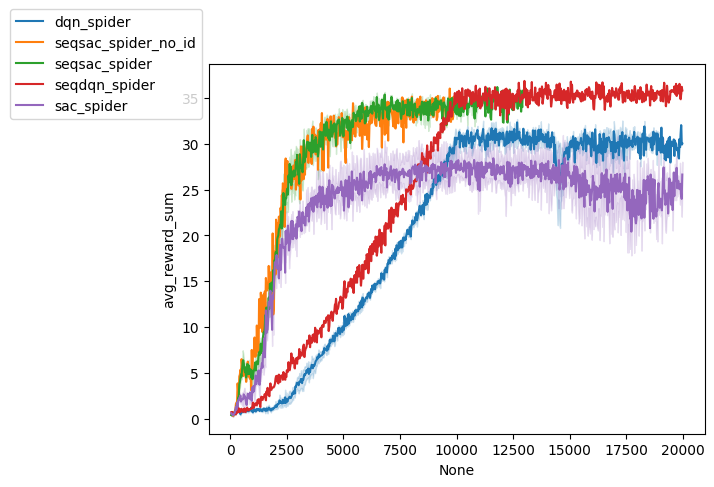

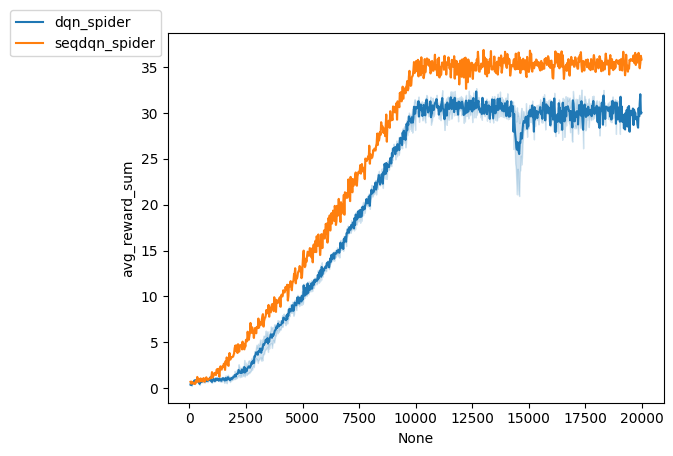

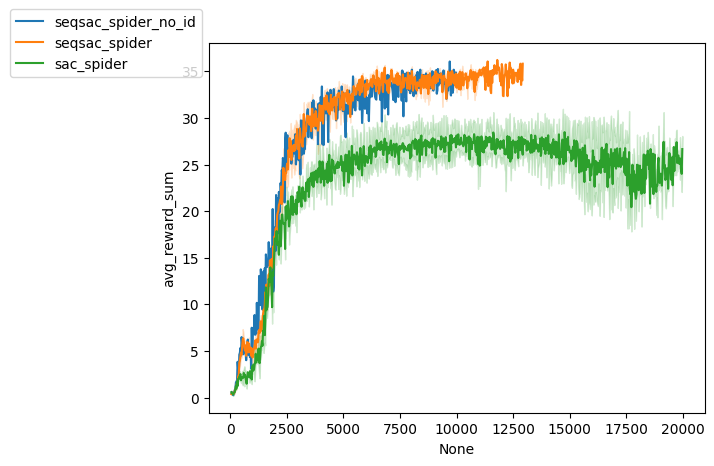

In [ ]:
sns.lineplot(data = df2, x = df2.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

plt.figure()
df3 = df2[df2["dir_name"].str.contains("dqn")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

plt.figure()
df4 = df2[df2["dir_name"].str.contains("sac")]
sns.lineplot(data = df4, x = df4.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)


In [6]:
# # display(df[df["dir_name"].str.match("custom")])
# df = df.replace({"./tensorboard_logs.*": ""}, regex = True)
# for lr in ["lr1e-4", "lr3e-4", "lr5e-4"]:
#     # df["lr"] = np.where(df["dir_name"].str.contains(lr), float(lr[2:]))
#     df.loc[df["dir_name"].str.contains(lr), 'lr'] = float(lr[2:])
# for gamma in ["gamma99e-2"]:
#     df["gamma"] = np.where(df["dir_name"].str.contains(gamma), float(gamma[5:]), None)
# for tau in ["tau5e-3"]:
#     df["tau"] = np.where(df["dir_name"].str.contains(tau), float(tau[3:]), None)
    
# # display(df[df["dir_name"].str.contains("custom")])
# # display(df["rollout/ep_rew_mean"])
# df

In [5]:
display(df["dir_name"].unique())

array(['lr1e-4_tau5e-3_gamma99e-2/custom',
       'lr1e-4_tau5e-3_gamma99e-2/energy',
       'lr1e-4_tau5e-3_gamma99e-2/solarcomfort',
       'lr3e-4_tau5e-3_gamma99e-2/custom',
       'lr3e-4_tau5e-3_gamma99e-2/energy',
       'lr3e-4_tau5e-3_gamma99e-2/solarcomfort',
       'lr5e-4_tau5e-3_gamma99e-2/custom',
       'lr5e-4_tau5e-3_gamma99e-2/energy',
       'lr5e-4_tau5e-3_gamma99e-2/solarcomfort'], dtype=object)

In [6]:
def plot(df, group, title, doesnotcontain : str = False, xrange = False, yrange = False):
    # custom grouping hue for lr, gamma, tau
    hue = df[["lr", "gamma", "tau"]].apply(lambda row: f"{row.lr}, {row.gamma}, {row.tau}", axis=1)
    
    # plot
    sns.set_style()
    if doesnotcontain:
        ax = sns.lineplot(data = df[(df["dir_name"].str.contains(group)) & (df["dir_name"].str.contains(doesnotcontain) == False)], x = "step", y = "rollout/ep_rew_mean", hue = hue)        
    else:
        ax = sns.lineplot(data = df[df["dir_name"].str.contains(group)], x = "step", y = "rollout/ep_rew_mean", hue = hue)

    if xrange: ax.set_xlim(xrange)
    if yrange: ax.set_ylim(yrange)
    
    plt.legend(title='Config (lr, gamma, tau)', loc='lower right')
    plt.ylabel("Episode reward sum")
    plt.title(title)
    plt.show()

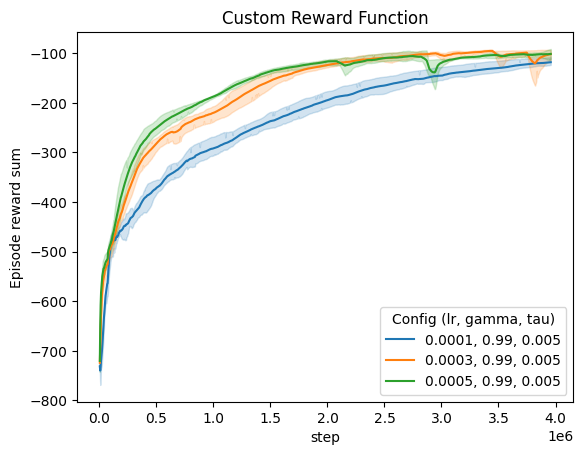

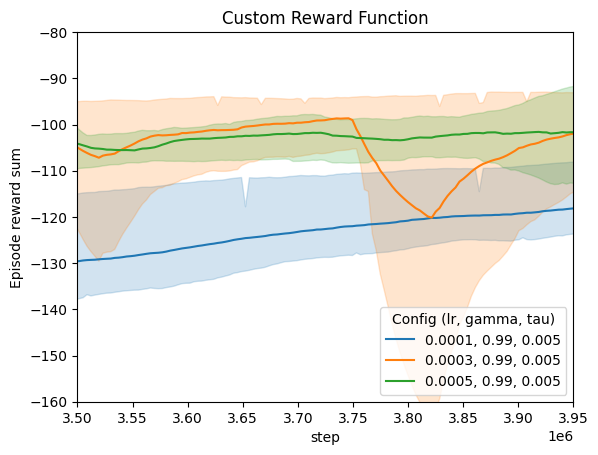

In [7]:
plot(df, "custom", "Custom Reward Function", "relaxed")
plot(df, "custom", "Custom Reward Function", "relaxed", xrange = [3500000, 3950000], yrange = [-160, -80])

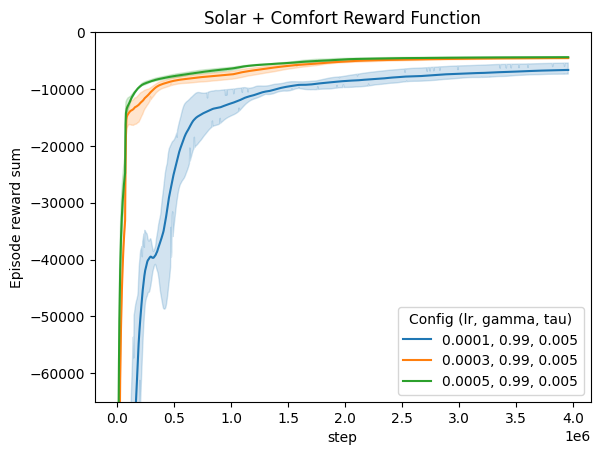

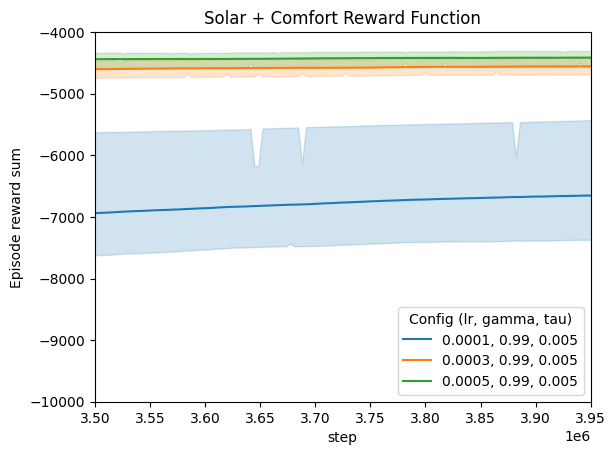

In [14]:
plot(df, "solarcomfort", "Solar + Comfort Reward Function", yrange = [-65000, 0])
plot(df, "solarcomfort", "Solar + Comfort Reward Function", xrange = [3500000, 3950000], yrange= [-10000, -4000])

In [12]:
# plot(df, "customrelaxed", "Relaxed Custom Reward Function")
# plot(df, "customrelaxed", "Relaxed Custom Reward Function", xrange = [3500000, 3950000], yrange = [-7000, 0])

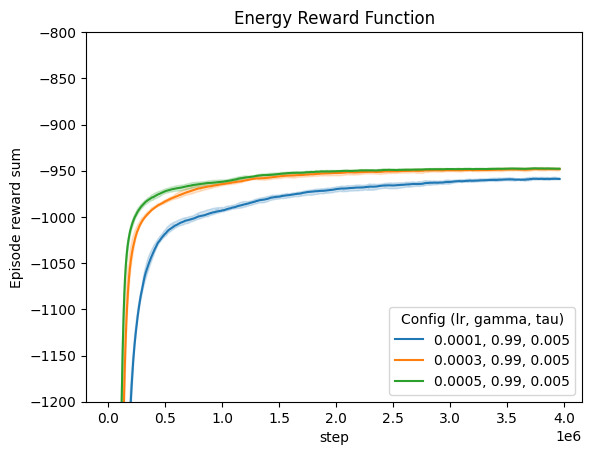

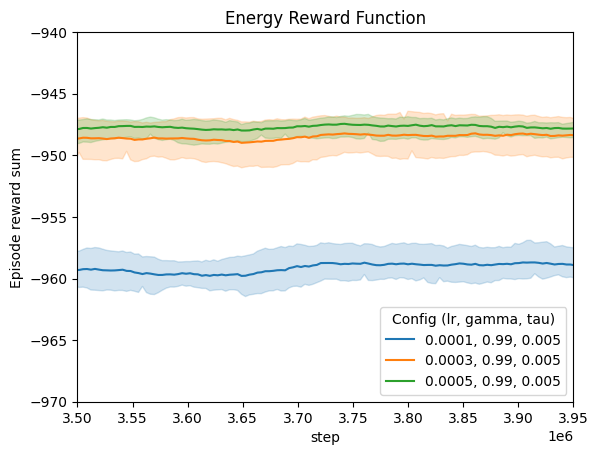

In [15]:
plot(df, "energy", "Energy Reward Function", yrange = [-1200, -800])
plot(df, "energy", "Energy Reward Function", xrange = [3500000, 3950000], yrange = [-970, -940])